# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns

The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts. During these
phone campaigns, an attractive long-term deposit
application, with good interest rates, was offered. For each
contact, a large number of attributes was stored (e.g. see
Table 2) and if there was a success (the target variable).
For the whole database considered, there were 6499
successes (8% success rate).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV


#### Collect Initial Data

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
#Identify columns with missing values
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

##### No columns are missing any values

##### Determine data types and non-null rows for each column along with whether they are numerical or categorical

In [5]:
df.info()

numerical_columns_selector = make_column_selector(dtype_exclude=object)
categorical_columns_selector = make_column_selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)
print (f'Numerical Columns: {numerical_columns}')
print (f'Categorical Columns: {categorical_columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### Determine if any columns are highly correlated

In [6]:
df_corr = df[numerical_columns].corr()
print(df_corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

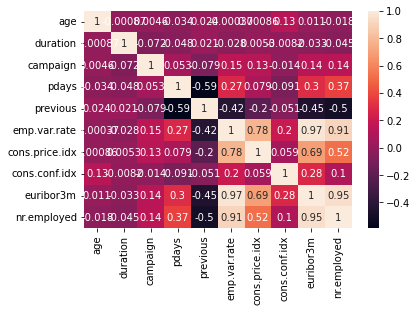

In [7]:
sns.heatmap(df_corr,annot=True)
plt.savefig('correl.png')

##### Consider Dropping columns euribor3m and emp.var.rate since they are highly correlated with nr.employed

In [8]:
#df = df.drop(['euribor3m','emp.var.rate'],axis=1)

##### Sample of the Data

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


##### The unique values for each feature with a relatively small number of unique values are:

In [11]:
for col in df.iloc[:, 0:19]:
  print(col, df[col].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
duration [ 261  149  226 ... 1246 1556 1868]
campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays [999

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Business Objective

The primary business objective is to determine whether a person is likely to subscribe to a term deposit when presented with marketing offers.
The information we have available to help make that determination includes: demographics of the person, information about the offer(s), when the offers were made,
and broad economic indicators. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
#Scale numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
#limiting dataset to the first 7 columns
bank_df = df.iloc[:, 0:7]

In [15]:
bank_df.head()

,age,job,marital,education,default,housing,loan
0,1.533034,housemaid,married,basic.4y,no,no,no
1,1.628993,services,married,high.school,unknown,no,no
2,-0.290186,services,married,high.school,no,yes,no
3,-0.002309,admin.,married,basic.6y,no,no,no
4,1.533034,services,married,high.school,no,no,yes


In [16]:
#generate one hot encoded columns for the categorial data and preview
X = pd.get_dummies(bank_df[['age','job','marital','education','default','housing','loan']])
print(X.columns)
print(X.head())

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes'],
      dtype='object')
        age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  1.533034           0                0                 0              1   
1  1.628993           0                0                 0              0   
2 -0.290186           0                0            

In [17]:
#binary encode the y target variable of whether the offer was accepted (yes=1,no=0) 
df_one = pd.get_dummies(df['y'])
print(df_one.iloc[:,1])
y = df_one.iloc[:,1]
print(y.head())
print(y.tail())


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: yes, Length: 41188, dtype: uint8
0    0
1    0
2    0
3    0
4    0
Name: yes, dtype: uint8
41183    1
41184    0
41185    0
41186    1
41187    0
Name: yes, dtype: uint8


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [19]:
dummy_clf = DummyClassifier().fit(X_train,y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print("Baseline Model Score: ",baseline_score)

Baseline Model Score:  0.8880256385354958


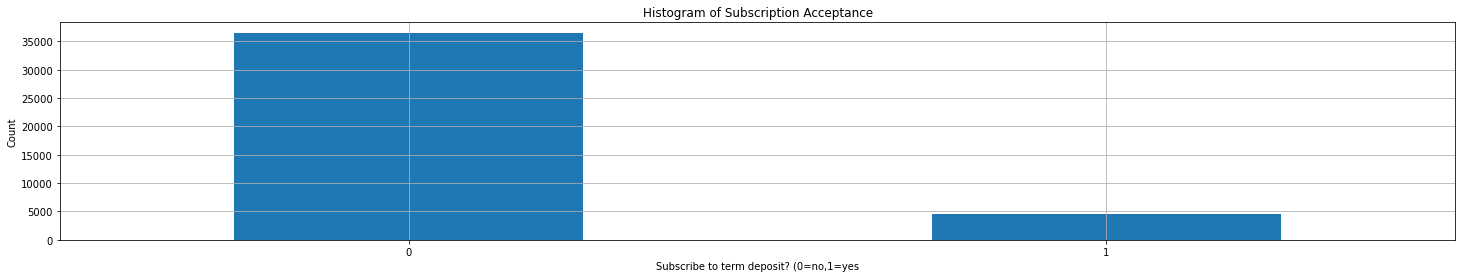

In [20]:
fig, ax = plt.subplots(figsize=(25, 4))
y.value_counts().plot(kind="bar")
ax.set_title("Histogram of Subscription Acceptance")
ax.set_ylabel("Count")
ax.set_xlabel("Subscribe to term deposit? (0=no,1=yes")
ax.grid()
ax.tick_params(axis='x', rotation=0)
plt.show()

##### The dummy baseline model has a relatively high accuracy since the dataset is imbalanced with much a high proporation of rows indicating non-acceptance of the subscription offer.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [21]:
start = time.time()
lgr_clf = LogisticRegression(max_iter=10000).fit(X_train,y_train)
end = time.time()
lgr_time = (end - start)

In [22]:
lgr_score_train = lgr_clf.score(X_train,y_train)
lgr_score_test = lgr_clf.score(X_test,y_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
print("Basic Logistic Regression model training time: ",lgr_time)
print("Basic Logistic Regression model training accuracy: ",lgr_score_train)
print("Basic Logistic Regression model test accuracy: ",lgr_score_test)

Basic Logistic Regression model training time:  0.31939101219177246
Basic Logistic Regression model training accuracy:  0.887119225664433
Basic Logistic Regression model test accuracy:  0.8880256385354958


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
start = time.time()
knn_clf = KNeighborsClassifier().fit(X_train,y_train)
end = time.time()
knn_time = (end - start)

In [25]:
knn_score_train = knn_clf.score(X_train,y_train)
knn_score_test = knn_clf.score(X_test,y_test)
print("Basic KNN model training time: ",knn_time)
print("Basic KNN model training accuracy: ",knn_score_train)
print("Basic KNN model test accuracy: ",knn_score_test)

Basic KNN model training time:  0.00780177116394043
Basic KNN model training accuracy:  0.8916836619079991
Basic KNN model test accuracy:  0.8791881130426338


In [26]:
start = time.time()
dt_clf = DecisionTreeClassifier().fit(X_train,y_train)
end = time.time()
dt_time = (end - start)

In [27]:
dt_score_train = dt_clf.score(X_train,y_train)
dt_score_test = dt_clf.score(X_test,y_test)
print("Basic Decision Tree model training time: ",dt_time)
print("Basic Decision Tree model training accuracy: ",dt_score_train)
print("Basic Decision Tree model test accuracy: ",dt_score_test)

Basic Decision Tree model training time:  0.18178820610046387
Basic Decision Tree model training accuracy:  0.9169661066329999
Basic Decision Tree model test accuracy:  0.8645236476643683


In [28]:
start = time.time()
svm_clf = SVC().fit(X_train,y_train)
end = time.time()
svm_time = (end - start)

In [29]:
svm_score_train = svm_clf.score(X_train,y_train)
svm_score_test = svm_clf.score(X_test,y_test)
print("Basic Support Vector Machine model training time: ",svm_time)
print("Basic Support Vector Machine model training accuracy: ",svm_score_train)
print("Basic Support Vector Machine model test accuracy: ", svm_score_test)

Basic Support Vector Machine model training time:  59.43233299255371
Basic Support Vector Machine model training accuracy:  0.8874429445469554
Basic Support Vector Machine model test accuracy:  0.8883169855297659


#### Comparison of the training time and accuracy of the basic models

In [30]:
basic_res_dict = {'Model': ['Logistic Regression','KNN','Decision Tree', 'SVM'],
           'Train Time (secs)': [lgr_time, knn_time,dt_time,svm_time],
           'Train Accuracy': [lgr_score_train, knn_score_train,dt_score_train,svm_score_train],
           'Test Accuracy': [lgr_score_test,knn_score_test,dt_score_test,svm_score_test]}
basic_results_df = pd.DataFrame(basic_res_dict)
basic_results_df

,Model,Train Time (secs),Train Accuracy,Test Accuracy
0,Logistic Regression,0.319391,0.887119,0.888026
1,KNN,0.007802,0.891684,0.879188
2,Decision Tree,0.181788,0.916966,0.864524
3,SVM,59.432333,0.887443,0.888317


#### Observations for basic models
- the difference in training times between LogReg, KNN, and Decision Tree is not significant since they are all < 1 sec.
- The SVM takes considerable longer to train
- They don't improve on the baseline model at least partly because the training data is heavily imbalanced.
Some potential ways to address this would be to a) gather more examples of subscription acceptance b) generate synthetic data with acceptance or c) reduce the number of non exceptance

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

####  Added Hyperparameter tuning & cross fold validation using grid search to each model training

In [31]:
lgr_params = [{'solver': ['newton-cg',  'liblinear']},
              {'penalty':['l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

In [32]:
logreg = LogisticRegression(max_iter=10000,)
grid_lgr = GridSearchCV(logreg, param_grid = lgr_params,scoring='accuracy',cv=5).fit(X_train,y_train)
print("Logistic Regrssion Accuracy :",grid_lgr.best_score_)
print("mean fit time :",np.mean(grid_lgr.cv_results_['mean_fit_time']))
print("Best Model:",grid_lgr.best_estimator_)
#Note  Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty warnings are expected and acceptable for a subset of trainings

/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_l

Logistic Regrssion Accuracy : 0.8871192283348224
mean fit time : 0.18364553928375243
Best Model: LogisticRegression(max_iter=10000, solver='newton-cg')


In [33]:
knn_params = {'n_neighbors': [3,5,11,19,24,27],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

In [34]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params,cv=5).fit(X_train, y_train)
print("KNN Accuracy :",grid_knn.best_score_)
print("mean fit time :",np.mean(grid_knn.cv_results_['mean_fit_time']))
print("Best Model:",grid_knn.best_estimator_)

KNN Accuracy : 0.8867307531001186
mean fit time : 0.00930235981941223
Best Model: KNeighborsClassifier(metric='euclidean', n_neighbors=24)


In [35]:
dt_params = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

In [36]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params,cv=5).fit(X_train, y_train)

print("Decision Tree Accuracy :",grid_dt.best_score_)
print("mean fit time :",np.mean(grid_dt.cv_results_['mean_fit_time']))
print("Best Model:",grid_dt.best_estimator_)

Decision Tree Accuracy : 0.8871192283348224
mean fit time : 0.0525249203046163
Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [60]:
#Didn't use due to extended runtime
#svc_params = {'kernel': ['rbf', 'poly', 'linear'],'gamma': [0.1, 1.0, 10.0],}

In [37]:
svc_params = {'kernel': [ 'linear'],
         'gamma': [0.1,1.0,10.0],}

In [38]:
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid=svc_params,cv=2,n_jobs=-1).fit(X_train, y_train)
print("Support Vector Machine Accuracy :",grid_svc.best_score_)
print("mean fit time :",np.mean(grid_svc.cv_results_['mean_fit_time']))
print("Best Model:",grid_svc.best_estimator_)

Support Vector Machine Accuracy : 0.8871192265940799
mean fit time : 4.131492257118225
Best Model: SVC(gamma=0.1, kernel='linear')


In [39]:
pd.set_option('display.width', 10000)

In [40]:
grid_res_dict = {'Model': ['Logistic Regression','KNN','Decision Tree', 'SVM'],
           'Mean Fit time (secs)': [np.mean(grid_lgr.cv_results_['mean_fit_time']), np.mean(grid_knn.cv_results_['mean_fit_time']) ,np.mean(grid_dt.cv_results_['mean_fit_time']),np.mean(grid_svc.cv_results_['mean_fit_time'])],
           'Accuracy': [grid_lgr.best_score_, grid_knn.best_score_,grid_dt.best_score_,grid_svc.best_score_],
           'Best Model Parameters': [grid_lgr.best_estimator_,grid_knn.best_estimator_,grid_dt.best_estimator_,grid_svc.best_estimator_]}
grid_results_df = pd.DataFrame(grid_res_dict)
pd.set_option('display.max_colwidth', None)
grid_results_df

,Model,Mean Fit time (secs),Accuracy,Best Model Parameters
0,Logistic Regression,0.183646,0.887119,"LogisticRegression(max_iter=10000, solver='newton-cg')"
1,KNN,0.009302,0.886731,"KNeighborsClassifier(metric='euclidean', n_neighbors=24)"
2,Decision Tree,0.052525,0.887119,"DecisionTreeClassifier(criterion='entropy', max_depth=3)"
3,SVM,4.131492,0.887119,"SVC(gamma=0.1, kernel='linear')"


#### Observations for the improved models
- the relationship between the training times is similar to the basic models 
- They extra hyperparameters has led to a small improve over the baselince and basic models
- More data columns and balancing the data would likely lead to higher accuracy
- The SVM model training ran very long which prevented me from trying additional hyperparameter options

#### Attempt to improve model accuracy by supplying addition marketing details info to the training dataset

In [41]:
bank_ext_df = df.iloc[:, [0,1,2,3,4,5,6,7,10,11,12]]
bank_ext_df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,0.010471,-0.565922,0.195414
1,1.628993,services,married,high.school,unknown,no,no,telephone,-0.421501,-0.565922,0.195414
2,-0.290186,services,married,high.school,no,yes,no,telephone,-0.124520,-0.565922,0.195414
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,-0.413787,-0.565922,0.195414
4,1.533034,services,married,high.school,no,no,yes,telephone,0.187888,-0.565922,0.195414


In [42]:
X = pd.get_dummies(bank_ext_df[['age','job','marital','education','default','housing','loan','contact','duration','campaign','pdays']])
print(X.columns)
print(X.head())

Index(['age', 'duration', 'campaign', 'pdays', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone'], dtype='object')
        age  duration  campaign     pdays  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  ...  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  contact_cellular  contact_telephon

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [44]:
lgr_params = [{'solver': ['newton-cg',  'liblinear']},
              {'penalty':['l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

In [62]:
logreg = LogisticRegression(max_iter=10000,)
grid_lgr = GridSearchCV(logreg, param_grid = lgr_params,scoring='accuracy',cv=5).fit(X_train,y_train)
print("Logistic Regression Accuracy :",grid_lgr.best_score_)
print("mean fit time :",np.mean(grid_lgr.cv_results_['mean_fit_time']))
print("Best Model:",grid_lgr.best_estimator_)
#Note  Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty warnings are expected and acceptable for a subset of trainings

Logistic Regression Accuracy : 0.9050533006065773
mean fit time : 0.28229312896728515
Best Model: LogisticRegression(C=0.01, max_iter=10000)


/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_l

In [48]:
knn_params = {'n_neighbors': [3,5,11,19,24,27],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

In [49]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params,cv=5).fit(X_train, y_train)
print("KNN Accuracy :",grid_knn.best_score_)
print("mean fit time :",np.mean(grid_knn.cv_results_['mean_fit_time']))
print("Best Model:",grid_knn.best_estimator_)

KNN Accuracy : 0.9015246715147658
mean fit time : 0.010286070903142293
Best Model: KNeighborsClassifier(metric='euclidean', n_neighbors=19)


In [50]:
dt_params = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

In [51]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params,cv=5).fit(X_train, y_train)
print("Accuracy :",grid_dt.best_score_)
print("mean fit time :",np.mean(grid_dt.cv_results_['mean_fit_time']))
print("Best Model:",grid_dt.best_estimator_)

Accuracy : 0.9069632776479363
mean fit time : 0.07873886028925577
Best Model: DecisionTreeClassifier(max_depth=4)


In [ ]:
#svc_params = {'kernel': ['rbf', 'poly', 'linear'], 'gamma': [0.1, 1.0, 10.0],} - Did use due to excessive runtime

In [61]:
svc_params = {'kernel': ['linear'],
         'gamma': [0.1,1.0,10.0],}

In [63]:
svc = SVC()
#grid_svc = GridSearchCV(svc, param_grid=svc_params,cv=2,n_jobs=-1).fit(X_train, y_train) - resulted in execessive runtime
grid_svc = GridSearchCV(svc, param_grid=svc_params,cv=2,n_jobs=-1).fit(X_train, y_train)
print("Accuracy :",grid_svc.best_score_)
print("mean fit time :",np.mean(grid_svc.cv_results_['mean_fit_time']))
print("Best Model:",grid_svc.best_estimator_)

Accuracy : 0.8978343268564966
mean fit time : 38.4858144124349
Best Model: SVC(gamma=0.1, kernel='linear')


In [64]:
grid_res_ext_dict = {'Model': ['Logistic Regression','KNN','Decision Tree', 'SVM'],
           'Mean Fit time (secs)': [np.mean(grid_lgr.cv_results_['mean_fit_time']), np.mean(grid_knn.cv_results_['mean_fit_time']) ,np.mean(grid_dt.cv_results_['mean_fit_time']),np.mean(grid_svc.cv_results_['mean_fit_time'])],
           'Accuracy': [grid_lgr.best_score_, grid_knn.best_score_,grid_dt.best_score_,grid_svc.best_score_],
           'Best Model Parameters': [grid_lgr.best_estimator_,grid_knn.best_estimator_,grid_dt.best_estimator_,grid_svc.best_estimator_]}
grid_results_df = pd.DataFrame(grid_res_ext_dict)
pd.set_option('display.max_colwidth', None)
grid_results_df

,Model,Mean Fit time (secs),Accuracy,Best Model Parameters
0,Logistic Regression,0.282293,0.905053,"LogisticRegression(C=0.01, max_iter=10000)"
1,KNN,0.010286,0.901525,"KNeighborsClassifier(metric='euclidean', n_neighbors=19)"
2,Decision Tree,0.078739,0.906963,DecisionTreeClassifier(max_depth=4)
3,SVM,38.485814,0.897834,"SVC(gamma=0.1, kernel='linear')"


#### Observations for the models with additional data
- the relationship between the training times is similar to the basic models 
- they extra hyperparameters has led to a small improvement over the baselince and basic models
- the DecisionTree classifier was the most effective for the parameters tried since it had a relatively short training time and high accuracy compared to the other models with the added bonus that it is easier to explain